# Summary Statistics and Five Number Summary

In this notebook, we will look at how to use Python to calculate summary statistics in general and the five number summary in particular.

We will look at some simple examples first, and then work on some real datasets.

## Numpy Arrays

Numpy arrays can be used to store numerical data. In the example below, we calculate the mean and the five-number summary for an example dataset.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([85, 90, 29, 72, 65, 72, 68, 97, 24, 35,  2, 70,  9, 82, 14, 38, 26, 52, 67, 33])

print("Mean for dataset 'x'.")
print(f"Mean = {x.mean()}")

x_min = x.min()
Q1 = np.percentile(x, 25)
Q2 = np.percentile(x, 50)
Q3 = np.percentile(x, 75)
x_max = x.max()

print("\nFive number summary for dataset 'x'.")
print(f"Min = {x_min}")
print(f"Q1 = {Q1}")
print(f"Median = {Q2}")
print(f"Q3 = {Q3}")
print(f"Max = {x_max}")

Mean for dataset 'x'.
Mean = 51.5

Five number summary for dataset 'x'.
Min = 2
Q1 = 28.25
Median = 58.5
Q3 = 72.0
Max = 97


## Exercise 1

A second dataset, `y` is defined below.

Using the example above as a model, find the mean and the five number summary for this dataset and print it out.

In [56]:
y = np.array([83,  2, 85,  3, 99,  0, 65,  2, 24, 98, 62,  0,  8, 43, 83, 24, 75, 16,  7, 37])

# Type your code here

print("Mean for dataset 'y'.")
print(f"Mean = {y.mean()}")

y_min = y.min()
Q1 = np.percentile(y, 25)
Q2 = np.percentile(y, 50)
Q3 = np.percentile(y, 75)
y_max = y.max()

print("\nFive number summary for dataset 'y'.")
print(f"Min = {y_min}")
print(f"Q1 = {Q1}")
print(f"Median = {Q2}")
print(f"Q3 = {Q3}")
print(f"Max = {y_max}")

Mean for dataset 'y'.
Mean = 40.8

Five number summary for dataset 'y'.
Min = 0
Q1 = 6.0
Median = 30.5
Q3 = 77.0
Max = 99


Question: Based on the two sets of summary statistics, what are some differences between the two datasets?

## Box Plots

A box plot gives you a visual representation of the five number summary. It gives you a snapshot of the dataset, helping you to identify key features.

Here is the box plot for the dataset `x`.

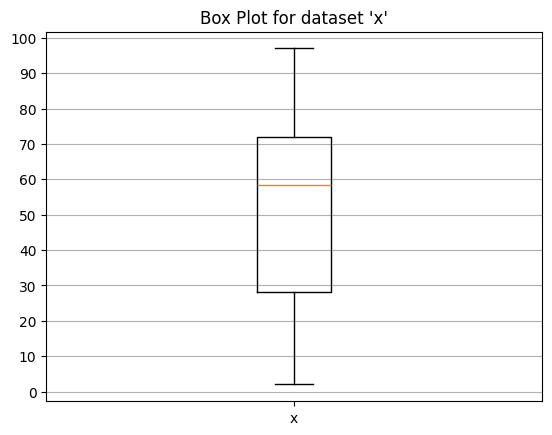

In [64]:
plt.boxplot(x)
plt.title("Box Plot for dataset 'x'")
plt.xticks([1], ['x'])
plt.yticks(range(0, 110, 10))
plt.grid(axis='y')
plt.show()

## Multiple Box Plots on the Same Axes

When comparing datasets, it is best to plot the box plots on the same graph. To do this, you put the box plots you want to show in a list. Let's do this for `x` and `y` side by side.


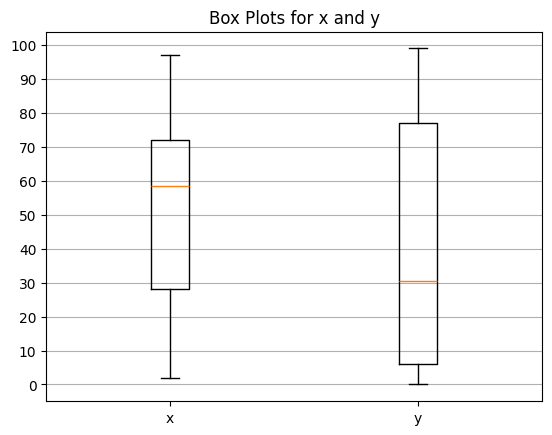

In [66]:
data_list = [x, y]
plt.boxplot(data_list)
plt.xticks([1, 2], ['x', 'y'])
plt.yticks(range(0, 110, 10))
plt.title("Box Plots for x and y")
plt.grid(axis='y')
plt.show()

## Exercise 2

For the two datasets below, d1 and d2, print out the five-number summary for each dataset.

Then create side-by-side boxplots to compare visually. Use your numbers and graphs to describe two ways in which the datasets differ.

In [19]:
# Preliminaries
import pandas as pd, numpy as np, matplotlib.pyplot as plt

pd.set_option("display.precision", 2)
acs = pd.read_csv('/home/shared/ACS_2024.csv')

# We will use the following dictionaries to recode some of the data
st_dict = {1: 'Connecticut', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'Rhode Island', 6: 'Vermont', 
11: 'Delaware', 12: 'New Jersey', 13: 'New York', 14: 'Pennsylvania', 21: 'Illinois', 22: 'Indiana', 23: 'Michigan', 
24: 'Ohio', 25: 'Wisconsin', 31: 'Iowa', 32: 'Kansas', 33: 'Minnesota', 34: 'Missouri', 35: 'Nebraska', 36: 'North Dakota', 
37: 'South Dakota', 40: 'Virginia', 41: 'Alabama', 42: 'Arkansas', 43: 'Florida', 44: 'Georgia', 45: 'Louisiana', 
46: 'Mississippi', 47: 'North Carolina', 48: 'South Carolina', 49: 'Texas', 51: 'Kentucky', 52: 'Maryland', 53: 'Oklahoma', 
54: 'Tennessee', 56: 'West Virginia', 61: 'Arizona', 62: 'Colorado', 63: 'Idaho', 64: 'Montana', 65: 'Nevada', 66: 'New Mexico', 
67: 'Utah', 68: 'Wyoming', 71: 'California', 72: 'Oregon', 73: 'Washington', 81: 'Alaska', 82: 'Hawaii', 
83: 'Puerto Rico', 96: 'State groupings (1980 Urban/rural sample)', 97: 'Military/Mil. Reservations', 
98: 'District of Columbia', 99: 'State not identified'}

mf_dict = {1:"Male", 2:"Female", 9:"Missing/blank"}


In [20]:
# Recoding / cleaning
acs.drop(columns=['SAMPLE', 'SERIAL', 'CBSERIAL', 'CLUSTER'], inplace=True)
acs = acs[acs['INCTOT']<999998]
acs['State'] = acs['STATEICP'].replace(st_dict)
acs['Gender'] = acs['SEX'].replace(mf_dict)

In [21]:
males = acs[acs['Gender']=='Male']
females = acs[acs['Gender']=='Female']

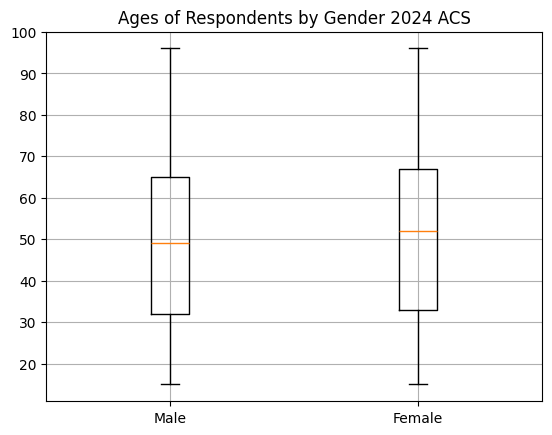

In [24]:
plt.boxplot([males['AGE'], females['AGE']], showfliers=False)
plt.xticks([1, 2], ['Male', 'Female'])
plt.title("Ages of Respondents by Gender 2024 ACS")
plt.grid(True)
plt.show()

In [29]:
acs[acs['Gender']=='Male'].describe()
acs[acs['Gender']=='Female'].describe()

,YEAR,HHWT,STATEICP,GQ,PERNUM,PERWT,SEX,AGE,INCTOT
count,297677.0,297677.00,297677.00,297677.00,297677.00,297677.00,297677.0,297677.00,297677.00
mean,2024.0,479.61,41.21,1.13,1.74,479.82,2.0,50.70,43001.99
std,0.0,435.83,20.97,0.59,1.05,438.56,0.0,20.42,60906.06
min,2024.0,5.01,1.00,1.00,1.00,5.01,2.0,15.00,-10000.00
25%,2024.0,235.47,23.00,1.00,1.00,235.47,2.0,33.00,8200.00
50%,2024.0,350.70,43.00,1.00,1.00,350.70,2.0,52.00,26550.00
75%,2024.0,561.12,54.00,1.00,2.00,566.13,2.0,67.00,56200.00
max,2024.0,11523.00,98.00,5.00,20.00,11523.00,2.0,96.00,982000.00


In [34]:
CO = acs[acs['State']=='Colorado']
CA = acs[acs['State']=='California']
MS = acs[acs['State']=='Mississippi']

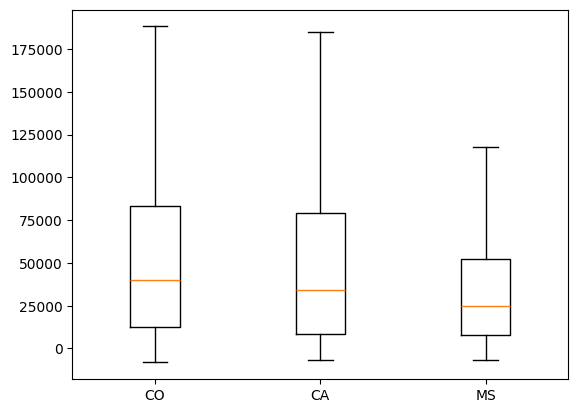

In [35]:
plt.boxplot([CO['INCTOT'], CA['INCTOT'], MS['INCTOT']], showfliers=False)
plt.xticks([1,2, 3], ['CO', 'CA', 'MS'])
plt.show()

In [37]:
CO.describe()

,YEAR,HHWT,STATEICP,GQ,PERNUM,PERWT,SEX,AGE,INCTOT
count,10749.0,10749.00,10749.0,10749.00,10749.00,10749.00,10749.0,10749.00,10749.00
mean,2024.0,470.03,62.0,1.17,1.69,460.23,1.5,48.27,65285.83
std,0.0,423.71,0.0,0.63,0.97,411.23,0.5,19.92,90590.87
min,2024.0,5.01,62.0,1.00,1.00,5.01,1.0,15.00,-8200.00
25%,2024.0,250.50,62.0,1.00,1.00,245.49,1.0,32.00,12500.00
50%,2024.0,345.69,62.0,1.00,1.00,340.68,2.0,47.00,40190.00
75%,2024.0,521.04,62.0,1.00,2.00,521.04,2.0,65.00,83000.00
max,2024.0,4744.47,62.0,4.00,11.00,4744.47,2.0,93.00,849000.00
